___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [97]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon

from mpl_toolkits.mplot3d import Axes3D

In [98]:
sptdata = pd.read_csv("data.csv")
# #Young People Survey
# coludata = pd.read_csv("columns.csv")
# respdata = pd.read_csv("responses.csv")

Dicionário dos dados:
https://www.kaggle.com/nyartsgnaw/analyzing-gender-differences/data

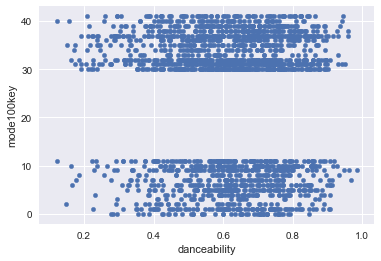

In [99]:
sptdata['mode100key'] = sptdata['mode']*30 + sptdata['key']
sptdata.plot(kind = "scatter", x = "danceability", y = "mode100key")

In [100]:
# danceability = sptdata['danceability']
# danceability.describe()


In [107]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
dance = ['danceability']
X = sptdata[dance]
y = sptdata.mode100key
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
# make predictions for all values of X
sptdata['mode100key_predicao'] = linreg.predict(X)
sptdata.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,mode100key,mode100key_predicao
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,32,22.887418
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,31,23.233041
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,32,22.868217
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,35,24.189265
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,5,23.482658


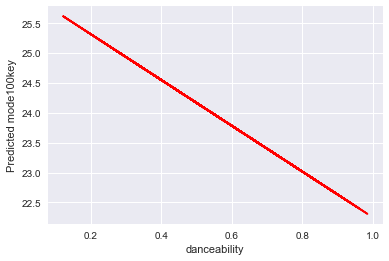

In [109]:
# plot those predictions connected by a line
plt.plot(sptdata.danceability, sptdata.mode100key_predicao, color='red')
plt.xlabel('danceability')
plt.ylabel('Predicted mode100key')

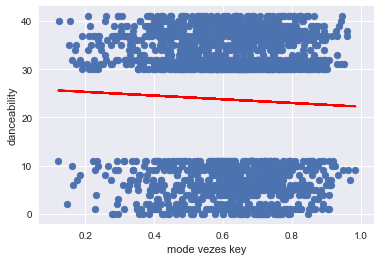

In [117]:
# put the plots together
plt.scatter(sptdata.danceability, sptdata.mode100key)
plt.plot(sptdata.danceability, sptdata.mode100key_predicao, color='red')
plt.xlabel('mode vezes key')
plt.ylabel('danceability')

**Refresher: interpreting linear regression coefficients**

Linear regression equation: $y = \beta_0 + \beta_1x$

In [118]:
# compute prediction for al=2 using the equation
linreg.intercept_ + linreg.coef_ * 2

array([ 18.40583958])

In [114]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 18.40583958])

In [115]:
# examine coefficient for al (mode100key)
key, linreg.coef_

(['mode100key'], array([-3.84025567]))

**Interpretation:** A 1 unit increase in 'mode100key' is associated with a 0.00048278 unit decrease in 'danceability'.

In [116]:
# increasing mode100key by 1 (so that al=3) decreases 'danceability' by 0.00048278.
0.62890386 - 0.00048278

0.62842108

In [ ]:
# compute prediction for al=3 using the predict method
linreg.predict(3)

## **Part 2:** Predicting a Categorical Response